In [2]:
%load_ext autoreload
%autoreload 2
import handcalcs.render

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Aci 318-19
#### Alternative moment of inertia for elastic anaylsis at factored loads ACI318-19M

In [54]:
%%render
fc = 65 # specified compressive strength of concrete, MPa
fy = 420 # specified yield strength for nonprestressed rein-forcement,MPa

# Note that the dimension c33 is the depth of the Section in the 2-2 direction and contributes primarily to I33.
section_c22 = 400 # cross section width, mm
section_c22 = 600 # cross section width, mm
section_c33 = 1200 # cross section length, mm
section_cc = 40 # 20.5.1.3 clear cover of reinforcement, mm
rft_ratio = 0.047 # reinforcements ratio

# factored axial force; to be taken as positive for compression and negative for tension, N
Pu = 2633 * 1e3 # ultimate design axial force
Mu_22 = 1132 * 1e6 # ultimate desigm moment about local axis 2-2 as per ETABS
Mu_33 = 1854 *1e6  # ultimate desigm moment about local axis 3-3 as per ETABS


<IPython.core.display.Latex object>

In [55]:
%%render
Ag = section_c22 * section_c33 # gross area of concrete section, mm²
Ast = Ag * rft_ratio # total area of longitudinal reinforcement bars, mm²
Po = 0.85 * fc * (Ag - Ast) + fy * Ast # 22.4.2.2 nominal axial strength at zero eccentricity, N

<IPython.core.display.Latex object>

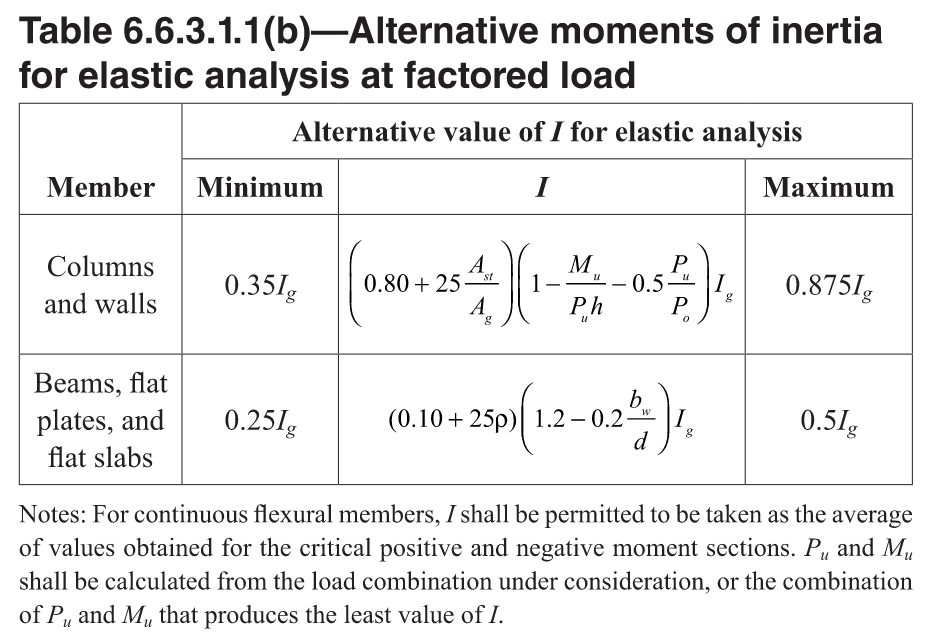

In [56]:
def calculate_column_actual_moment_of_inertia(Ig:float, h:float, Ag:float, Ast:float, Po:float, Pu:float, Mu:float) -> float:
    '''
     calculate moments of inertia for elastic analysis at factored load
     as per ACI318-19 Table 6.6.3.1.1(b)
    '''
    I_min = 0.35 * Ig # mm⁴
    I_max = 0.875 * Ig # mm⁴
    I_calculated = (0.8 + 25 * Ast / Ag)*(1 - (Mu/(Pu*h)) - 0.5 * (Pu/Po)) * Ig
    I = max(min(I_calculated,I_max),I_min)
    return I

In [61]:

Ig_22 = section_c33 * section_c22**3 / 12 # moment of inertia of gross concrete section about centroidal axis, neglecting reinforcement, mm⁴
Ig_33 = section_c22 * section_c33**3 / 12 # moment of inertia of gross concrete section about centroidal axis, neglecting reinforcement, mm⁴

I_22 = calculate_column_actual_moment_of_inertia(Ig_22,section_c22,Ag,Ast,Po,Pu,Mu_22)
display(I_22/Ig_22)

I_33 = calculate_column_actual_moment_of_inertia(Ig_33,section_c33,Ag,Ast,Po,Pu,Mu_33)
display(I_33/Ig_33)

0.509937308802607

0.7662197496179001